**1. Install and Import Dependencies**

In [ ]:
# mount google drive if required (unhash the following)
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html
     |█████████████▌                  | 834.1 MB 1.5 MB/s eta 0:13:10tcmalloc: large alloc 1147494400 bytes == 0x38fc0000 @  0x7f0ef6b2e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |█████████████████               | 1055.7 MB 1.3 MB/s eta 0:12:10tcmalloc: large alloc 1434370048 bytes == 0x7d616000 @  0x7f0ef6b2e615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12604, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 12604 (delta 5), reused 15 (delta 1), pack-reused 12579
Receiving objects: 100% (12604/12604), 12.47 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (8628/8628), done.


In [ ]:
cd yolov5

/content/yolov5


In [ ]:
pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 5.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
%pip install -q roboflow

     |████████████████████████████████| 145 kB 5.0 MB/s 
     |████████████████████████████████| 178 kB 48.4 MB/s 
     |████████████████████████████████| 1.1 MB 48.7 MB/s 
     |████████████████████████████████| 67 kB 6.8 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 138 kB 51.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.0 requires torch==1.12.0, but you have torch 1.8.1+cu111 which is incompatible.


In [ ]:
!pip install Pillow==9.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.3 MB 5.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2


**2. Load Model, for use on pretrained classes in YOLOv5**

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-10 Python-3.7.13 torch-1.8.1+cu111 CPU



  0%|          | 0.00/14.1M [00:00<?, ?B/s]


Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

**3. For Detections with Images on YOLOv5 pretrained classes, Run below**

In [ ]:
img = '/content/crowd1.png'

In [ ]:
#model.conf = 0.8  # confidence threshold (0-1)
#model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes = [0]  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

results = model(img)  

results.print()

image 1/1: 428x728 16 persons
Speed: 17.9ms pre-process, 281.0ms inference, 2.8ms NMS per image at shape (1, 3, 384, 640)


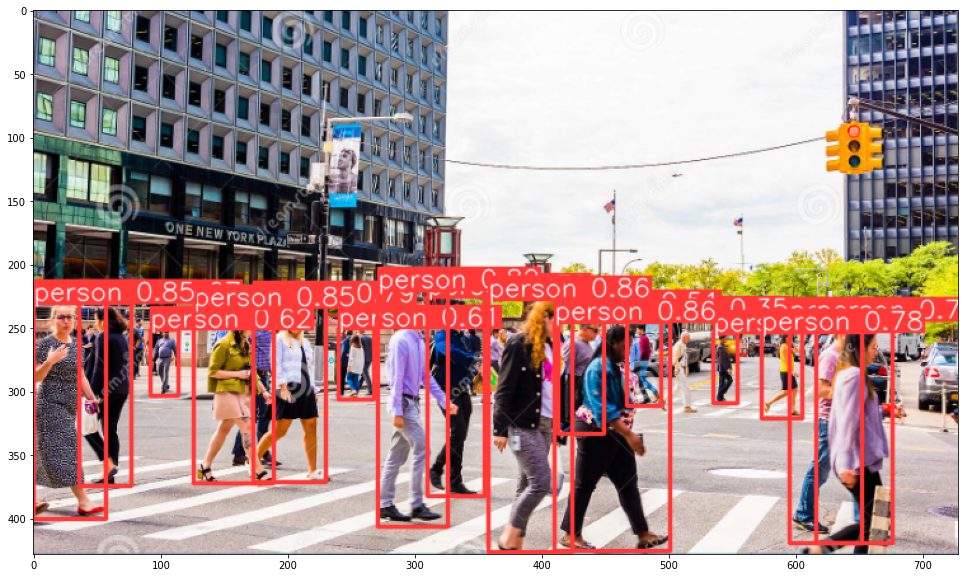

In [ ]:
%matplotlib inline  

plt.figure(figsize = (200,10))
plt.imshow(np.squeeze(results.render())) 
plt.show()

**4. For Real time Detections on YOLOv5 pretrained classes, Run below**

In [ ]:
# generate video of detected objects. Example of argument as below
#!python detect.py --weights "your weights.pt" --source "video/image/stream" --classes 0,1,2

!python detect.py --weights "yolov5s.pt" --source "/content/video-4x.mp4" --classes 0